# Introduction
The aim of this project is to analyze biodiversity data from the National Parks Service, precisely about different species observed across different national park locations.

This project will scope, prepare, analyze data and explain findings from the analysis.

Main question this project seeks to answer are:

- What is the distribution of conservation status for species?
- What are the differences between types of species and conservation status?
- Which types of species are mostly protected?
- Which park has the largest number of observed endangered species?
- Which species are mostly endangered and how they distributed across national parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

## Project scope
It is important to provide a scope of a project before getting started. The project scope divided into four sections of: project goals, data, analysis, conclusion. First section of project goals lists key question the project seeks to answer. Second section relates to data, provided in advance and needs to be rechecked for following analysis competence. Third section 

### Project goals
This project will adopt the perspective of a biodiversity analyst working for the National Parks Service. The aim of the National Park Service is to preserve the diversity of species in their parks, including those that are at risk of extinction. As a biodiversity analyst, the primary goals will be to study the characteristics of these species and their conservation status, as well as their relationship to the national parks.

Key questions of the research: 
- What is the distribution of conservation status for species?
- What are the differences between types of species and conservation status?
- Which types of species are mostly protected?
- Which park has the largest number of observed endangered species?
- Which species are mostly endangered and how they distributed across national parks?

### Data
The project package includes two `CSV` datasets: one contain details about each species live across national parks, and the other has observations of species and their corresponding park locations. These datasets will be utilized to achieve the project's objectives through analysis.

### Analysis 
This section will utilize descriptive statistics and data visualization methods to gain a deeper understanding of the data. Additionally, statistical inference will be employed to determine the statistical significance of the observed values. Metrics include:

1. Distributions
1. Counts
1. Statistical significance
1. Categorical data analysis 

### Evaluations
Finally, results will be summarized and it will be ensured that the analysis output aligns with the initial questions outlined in the goals section. This section will also provide insights into what has been learned throughout the process and highlight any unanswered questions.

## Import Python modules

Import modules for the analysis:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
from scipy.stats import chi2_contingency

## Load the data

#### Check for data files in working directory

There are two `csv` files in working directory `species_info.csv` and `observations.csv`

In [3]:
dir_path = os.getcwd()
files = os.listdir(dir_path)
print(files)

['species_info.csv', '.DS_Store', 'biodiversity.ipynb', 'biodiversity_solution.ipynb', '.ipynb_checkpoints', 'observations.csv']


### Species data

Species data `species_info.csv` has information about species live across national parks.

The dataset columns include:
- **category** - The category of biological classification for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status

In [4]:
data_species = pd.read_csv('species_info.csv')
data_species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


#### Shape of the data
Species data has 4 columns and 5824 rows

In [5]:
print(f"species shape: {data_species.shape}")

species shape: (5824, 4)


### Observations data

Species data `observations.csv` has information about amount of species observed in national parks.

The dataset columns include:
- **scientific_name** - The scientific name of each species
- **park_name** - Name of national parks
- **observations** - Amount of species observations

In [6]:
data_observations = pd.read_csv('observations.csv')
data_observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


#### Shape of the data
Observations data has 3 columns and 23296 rows

In [7]:
print(f"observations shape: {data_observations.shape}")

observations shape: (23296, 3)


# Examine the data

## Species data

Species data columns categorized as follows:
1. `Category` has `7` categories: `Mammal`, `Bird`, `Reptile`, `Amphibian`, `Fish`, `Vascular Plant`, `Nonvascular Plant`

2. `Scientific name` has `5541` categories

3. `Common names` has `5504` categories

4. `Conservation status` has `4` categories: `nan`, `Species of Concern`, `Endangered`, `Threatened`, `In Recovery`

#### Category variable

Count of groups for `category` variable shows that:
- `Vascular Plant` has the largest share across categories (`4470` plants) 
- `Reptiles` have the smallest share across categories (`79` reptiles)

In [8]:
data_species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

#### Conservation status variable

Count of groups for `conservation_status` variable shows that:
- `Species of Concern` has the largest share across categories (`161` species) 
- `Reptiles` have the smallest share across categories (`4` species)
- There are `5633` na values, which (by the dint of a research) were converted into `Not under threat` variable

In [9]:
# replace NA with "Not under threat" 
data_species.conservation_status.fillna('Not under threat', inplace=True)
print(data_species.groupby("conservation_status").size())

conservation_status
Endangered              16
In Recovery              4
Not under threat      5633
Species of Concern     161
Threatened              10
dtype: int64


In [28]:
# count a share of conservation sttatus
conservation_share = round(((16 + 4 + 161 + 10) / 5633)*100)
print(f"Conservation status shape: {conservation_share}%")

Conservation status shape: 3%


## Observation data

Observations data columns categorized as follows:
1. `Scientific name` has `5541` categories

2. `Park name` has `4` categories: `Great Smoky Mountains National Park`, `Yosemite National Park`, `Bryce National Park`, `Yellowstone National Park`

3. `Observations` is a numerical variable and `304` categories

In [11]:
# printout unique values for each column
for col in data_observations.columns:
    unique_values = data_observations[col].unique()
    nunique_values = data_observations[col].nunique()
    print(f"Column: '{col}'")
    print(f"Categories in column: {unique_values}")
    print(f"Number of categories in column '{col}': {nunique_values}")
    print("---------------")

Column: 'scientific_name'
Categories in column: ['Vicia benghalensis' 'Neovison vison' 'Prunus subcordata' ...
 'Ranunculus hebecarpus' 'Gulo gulo' 'Dichanthelium depauperatum']
Number of categories in column 'scientific_name': 5541
---------------
Column: 'park_name'
Categories in column: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
Number of categories in column 'park_name': 4
---------------
Column: 'observations'
Categories in column: [ 68  77 138  84  85 112 228  39 168 250 103 114 101 279  72  65 143 165
 150  80  83 109 158 167 135 247  73 261 177 117  79  96 140 116 239 262
  71 176 148  76 235 283  25 246  64 281  88  67 254 152 147 213 265 107
 156  47 157  89 154 127 106  75  36 137 244  63 214  92 108  54 105 115
  98 223  82  90 218  58  59  48 208  95  70 100  49  56 134  91  86 136
 257 123 263 118 258 252  27  74  94 132  57 282 110 253 267 230 124 131
 164 260 119 233 245  60 151  66 206 189 242 111

# Analysis

### Merge data
To conduct an analysis, we should merge both `data_observations` and `data_species` datasets and create a new one `merged_df`

In [12]:
# create a dataframe with droped dublicates of "scientific_name" variable and get a unique values dataframe
species_dd = data_species.drop_duplicates(subset=['scientific_name'])
# merge dataframes together
merged_df = pd.merge(data_observations, species_dd, how='left')
merged_df

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not under threat
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Not under threat
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,Not under threat
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,Not under threat
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,Not under threat
...,...,...,...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173,Vascular Plant,Prairie Tea,Not under threat
23292,Otospermophilus beecheyi,Bryce National Park,130,Mammal,California Ground Squirrel,Not under threat
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140,Vascular Plant,Sessileflower False Goldenaster,Not under threat
23294,Dicranella rufescens,Yosemite National Park,171,Nonvascular Plant,Dicranella Moss,Not under threat


Make sure datasets merged correctly:

`merged_df` length is equal to length of `data_observations`

sum of numerical column `observations` in `merged_df` equal to sum of same column in `data_observations`

In [13]:
# chaeck for observations length equality
if len(data_observations.observations) == len(merged_df.observations):
    print("The length of observations in both df is equal")
else:
    print("The length of observations in both df is not equal")
# check for sum of observations equality  
if data_observations['observations'].sum() == merged_df['observations'].sum():
    print("The sum of observations in both df is equal")
else:
    print("The sum of observations in both df is not equal")

The length of observations in both df is equal
The sum of observations in both df is equal


## The distribution of conservation status across types of species

As soon as `data_species` represents unique values for `conservation_status` and `category`, it will be used for a pivot table of the distribution of conservation status for species.

(Instead of `merged_data` which has duplicated for these variables)

`Not under threat` category excluded from the analysis due to the interest in rare species. 

### Distribution of conservation status

To analyze the distribution of conservation status, it should be observed an objective distribution of species under protection and vice versa.

First, create a dummy variable `is_protected` which has a `True` value for species under risk and `False` value for opposite.

In [14]:
merged_df['is_protected'] = merged_df['conservation_status'].apply(lambda x: 'Not Protected' if x == 'Not under threat' else 'Protected')

On the table below, it could be seen that vast majority of species is not protected. 

Nevertheless, Mammals (17%) and Birds (15%) have the larges share of protection across all species categories.

In [15]:
# create a pivot tables based on variables of interest, add percentage column for "ptoected" status
protected_pivot = merged_df.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
protected_pivot.columns = ['category', 'Not protected', 'Protected']
protected_pivot['Protected %'] = protected_pivot['Protected'] / \
                                      (protected_pivot['Protected'] + protected_pivot['Not protected']) * 100
protected_pivot

,category,Not protected,Protected,Protected %
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,10,8.000000
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


#### Statistical significance

This part of analysis will run chi-squared tests to find out whether there is statistically significant difference in conservation status rates.

The first test checks the difference between `mammals` and `birds`.

After conducting the chi-squared test, multiple values are obtained, and among them, the second value corresponds to the p-value. In general, the standard p-value used to assess statistical significance is 0.05. However, in this particular case, the obtained p-value is 0.69, which is considerably higher than 0.05. Therefore, it can be concluded that there is no significant relationship between mammals and birds, indicating that the variables are independent of each other.

In [34]:
# create a dataframe for "mammals" and "birds" values
contingency1 = [[30, 146],
              [75, 413]]
# run statistics test
stat, p, dof, expected = chi2_contingency(contingency1)
# printout results
print("Contingency Table:")
print(contingency1)
print("Expected Frequencies:")
print(expected)
print("Chi-Square Test Statistic:", stat)
print("P-value:", p)
print("Degrees of Freedom:", dof)

Contingency Table:
[[30, 146], [75, 413]]
Expected Frequencies:
[[ 27.8313253 148.1686747]
 [ 77.1686747 410.8313253]]
Chi-Square Test Statistic: 0.1617014831654557
P-value: 0.6875948096661336
Degrees of Freedom: 1


The second test checks the difference between `mammals` and `fish`.

The obtained p-value for this test is 0.03, which is lower than the standard threshold of 0.05. This indicates that there is a statistically significant difference between fish and mammals. Specifically, the results indicate that mammals have a significantly higher rate of protection compared to fish.

In [16]:
# create a dataframe for "mammals" and "fish" values
contingency2 = [[30, 146],
               [10, 115]]
# run statistics test
stat, p, dof, expected = chi2_contingency(contingency2)
# printout results
print("Contingency Table:")
print(contingency2)
print("Expected Frequencies:")
print(expected)
print("Chi-Square Test Statistic:", stat)
print("P-value:", p)
print("Degrees of Freedom:", dof)

Contingency Table:
[[30, 146], [10, 115]]
Expected Frequencies:
[[ 23.38870432 152.61129568]
 [ 16.61129568 108.38870432]]
Chi-Square Test Statistic: 4.434482041318357
P-value: 0.03521990485242024
Degrees of Freedom: 1


#### In more detail

According to the table and graph below:
 - The largest share of conservation status is `Species of concern` which has 161 different species 
 - There are `16` species having `Endangered` status
 - The most endangered species categories are `Mammal` (7 species) and `Bird` (4 species)
 - For `In recovery` status there are 3 `Birds` and 1 `Mammal` - birds have greater tendency to start back

In [18]:
# create a table based on variables of interest, giving a specification for excluding "Not under threat" category
conservation_by_species = data_species[data_species.conservation_status != "Not under threat"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()
# add summary statistics columns and row
conservation_by_species['- Total for status'] = conservation_by_species.sum(axis=1)
conservation_by_species.loc['- Total for category'] = conservation_by_species.sum(axis=0)

conservation_by_species

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant,- Total for status
conservation_status,,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0,16.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN,4.0
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0,161.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0,10.0
- Total for category,7.0,79.0,11.0,38.0,5.0,5.0,46.0,191.0


In [19]:
# before creating a plot, exlude summary statistics column and row
conservation_by_species = conservation_by_species.drop(index=['- Total for category'])
excluded_column = '- Total for status'
conservation_by_species = conservation_by_species.drop(columns=excluded_column)

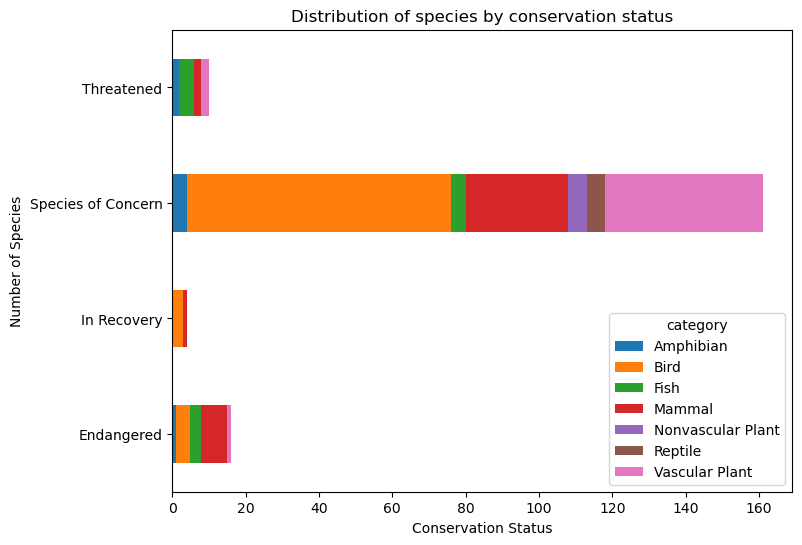

In [21]:
# create a stacked bars plot
ax = conservation_by_species.plot(kind = 'barh', figsize=(8,6), 
                               stacked=True)
plt.title("Distribution of species by conservation status")
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

## Distribution of conservation species across national parks 

### Distribution by conservation type

Yellowstone National Park has got the largest amount of totally observed species (1 443 562) and the largest amount of observed protected species (38 663).

The share of protected species from overall population across national parks is pretty much the same (average: 2.69%)

In [22]:
# create a table based on varibales of interest
protected_by_parks = merged_df.groupby(['park_name', 'is_protected'])\
                        .observations.sum()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='park_name',
                                      values='observations')\
                        .reset_index()
# name columns
protected_by_parks.columns = ['Park name', 'Not protected', 'Protected']
# add percentage column for protected status
protected_by_parks['Protected %'] = protected_by_parks['Protected'] / \
                                      (protected_by_parks['Protected'] + protected_by_parks['Not protected']) * 100
# add summary column
protected_by_parks['- Total observed'] = protected_by_parks['Protected'] + protected_by_parks['Not protected']
protected_by_parks

,Park name,Not protected,Protected,Protected %,- Total observed
0,Bryce National Park,559926,16099,2.794844,576025
1,Great Smoky Mountains National Park,420643,11177,2.588347,431820
2,Yellowstone National Park,1404899,38663,2.678305,1443562
3,Yosemite National Park,839976,23356,2.705332,863332


In [30]:
# calculate a share
average_protected = round(protected_by_parks['Protected %'].mean(), 2)
print('Average amount of protected species across pnational parks: '+ str(average_protected) +'%')

Average amount of protected species across pnational parks: 2.69%


Moreover, Yellowstone National Park leads in amount of observed endangered species (1 228).

In [19]:
# create a pivot table based on variables of interest
unpivoted = merged_df.groupby(['park_name', 'conservation_status'])['observations'].sum().reset_index()
conservation_by_parks_pivot = pd.pivot_table(unpivoted, 
    columns='conservation_status',
    index='park_name',
    values='observations')
# remane columns
conservation_by_parks_pivot = conservation_by_parks_pivot[['Endangered', 'In Recovery', 'Species of Concern', 'Threatened', 'Not under threat']]
conservation_by_parks_pivot

conservation_status,Endangered,In Recovery,Species of Concern,Threatened,Not under threat
park_name,,,,,
Bryce National Park,489,258,14925,427,559926
Great Smoky Mountains National Park,334,189,10314,340,420643
Yellowstone National Park,1228,559,35789,1087,1404899
Yosemite National Park,747,386,21551,672,839976


### Distribution of the mostly endangered species across national parks.

For that part of the project, the analysis will focus on which species exactly mostly endangered and how they are distributed across national parks.

In [75]:
endangered_df = merged_df[merged_df.conservation_status =='Endangered'] 
# Group the filtered dataframe by the animal names and sum the observations for each animal
endangered_df_grouped = endangered_df.groupby('scientific_name')['observations'].sum().reset_index()
# Sort the grouped dataframe by the sum of observations in descending order
endangered_df_sorted = endangered_df_grouped.sort_values(by='observations', ascending=False)
# Get the top 10 animal names with the largest sum of observations
top_endangered = endangered_df_sorted.head(10)

top_endangered

,scientific_name,observations
0,Canis lupus,715
3,Etheostoma percnurum,166
4,Geum radiatum,162
8,Myotis grisescens,160
7,Gymnogyps californianus,156
5,Glaucomys sabrinus coloratus,153
11,Ovis canadensis sierrae,153
2,Chasmistes liorus,146
12,Picoides borealis,146
9,Myotis sodalis,145


In [94]:
# prinout share
wolf_Canis_lupus_rate = (round((top_endangered.loc[top_endangered.scientific_name == 'Canis lupus', 'observations'].values[0]) / top_endangered.observations.sum(), 2))*100
print('Canis lupus Wolf share of endangered animals: ' + str(round(wolf_Canis_lupus_rate)) + '%')

Canis lupus Wolf share of endangered animals: 34%


In [98]:
# create a pivot table based on variables of interest
wolf_Canis_lupus_by_parks = merged_df[merged_df.scientific_name == "Canis lupus"]\
    .groupby(["park_name", "scientific_name"])['observations']\
    .sum()\
    .unstack()

wolf_Canis_lupus_by_parks

scientific_name,Canis lupus
park_name,
Bryce National Park,130
Great Smoky Mountains National Park,59
Yellowstone National Park,330
Yosemite National Park,196


## Conclusions

This project observed, visualized data and created inferences about species across four national pars.

By the dint of the analysis above the project answered following questions:
This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The majority of species does not have conservation status. Only 3% of species have it. 
- What are the differences between types of species and conservation status?
    - There was no significant difference in conservation percentage between mammals and birds, there was a statistically significant difference between mammals and fish.
- Which types of species are mostly protected?
    - Mammals (17%) and birds (15%) are mostly protected species.
- Which park has the largest number of observed endangered species?
    - Yellowstone National Park has got the largest amount of totally observed species (1 443 562) and the largest amount of observed protected species (38 663). Moreover, Yellowstone National Park leads in amount of observed endangered species (1 228).
- Which species are mostly endangered and how they distributed across national parks?
    - Canis lupus Wolf is the most endangered animal (34%). The vast majority of Canis lupus Wolf lives in Yellowstone National Park.